In [1]:
#Decision Tree and cross validation 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap
from random import randint
import sklearn
print (sklearn.__version__) 

0.20.4


In [2]:
os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
data = pd.read_csv(os.path.join(data_directory, "label_encoding.csv"))

### scatter_matrix
<br>
It is difficult to read the plot with many attribute

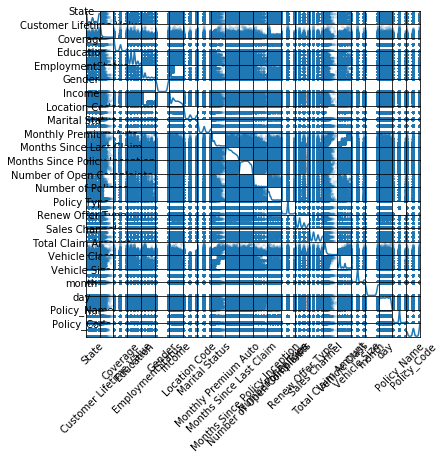

In [3]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

sm=scatter_matrix(data,alpha=0.2, figsize=(6,6), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

**Scatter plot for two predictors**

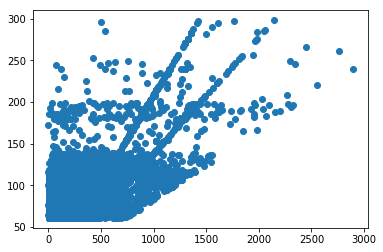

In [4]:
 plt.scatter(data["Total Claim Amount"],data['Monthly Premium Auto'])

**We could show regression line for two predictors**

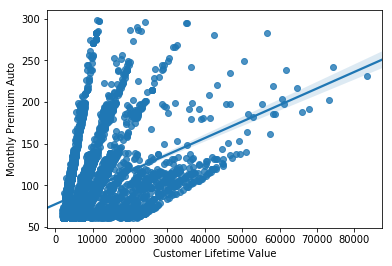

In [5]:
%matplotlib inline
#%matplotlib notebook
#sns.regplot(x='Total Claim Amount',y='Monthly Premium Auto',data=data) #shows regression
sns.regplot(x='Customer Lifetime Value',y='Monthly Premium Auto',data=data)
#sns.regplot(x='Total Claim Amount',y='Monthly Premium Auto',data=data)

## Decision Tree for label_encoding.csv

In [6]:
data.columns.tolist()
y = data['Response']   # select target,
X=data.select_dtypes(include=['int64', 'float64'])
filter_col=list(X.columns)

#print ('list of columns:', filter_col)
print ('int and float columns:', len(list(X.columns)))
print ('all columns:', len(list(data.columns.values)))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier


dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.tree_.impurity #keeps the gini values of the tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\nconfusion_matrix:')
print(confusion_matrix(y_test,y_pred))
print('\naccuracy_score:')
print(accuracy_score(y_test, y_pred))
print('\nclassification_report:')
print(classification_report(y_test,y_pred))

print("\nfeature_importances:")
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    #print (filter_col[indices[f]])
    print("%d. feature %d (%f) name: %s " % (f + 1, indices[f], importances[indices[f]], filter_col[indices[f]] ))

('int and float columns:', 24)
('all columns:', 26)

confusion_matrix:
[[1490   67]
 [   3  267]]

accuracy_score:
0.961685823755

classification_report:
              precision    recall  f1-score   support

          No       1.00      0.96      0.98      1557
         Yes       0.80      0.99      0.88       270

   micro avg       0.96      0.96      0.96      1827
   macro avg       0.90      0.97      0.93      1827
weighted avg       0.97      0.96      0.96      1827


feature_importances:
1. feature 6 (0.133911) name: Income 
2. feature 17 (0.113164) name: Total Claim Amount 
3. feature 11 (0.105243) name: Months Since Policy Inception 
4. feature 4 (0.099725) name: EmploymentStatus 
5. feature 1 (0.078685) name: Customer Lifetime Value 
6. feature 10 (0.074734) name: Months Since Last Claim 
7. feature 9 (0.073369) name: Monthly Premium Auto 
8. feature 21 (0.065952) name: day 
9. feature 15 (0.062418) name: Renew Offer Type 
10. feature 16 (0.025737) name: Sales Channel 
11.

## Trees Visualization 

In [7]:
#must import the following lines
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=filter_col,  
                                class_names=['Yes','No'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PDF
graph.write_pdf("FirstDT.pdf")

# Create PNG
graph.write_png("FirstDT.png")
# the tree need pruning

True

## ROC Plot

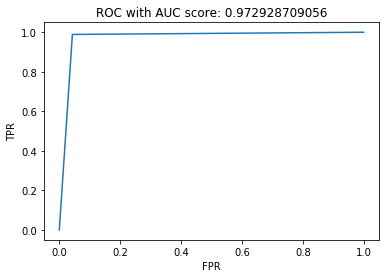

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

#both are numpy.ndarray
y_pred_probs = dtree.predict_proba(X_test) # first col is real data & second is predicted one
probability = dtree.predict_proba(X_test)[:,1] # only second col

#is Series
y_test = y_test.apply(lambda z : 1 if z=='Yes' else 0) #convert binary to 0 and 1

fpr, tpr, threshold = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,probability)))

plt.show()

In [9]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score
from sklearn import metrics
# Evaluate predictions
print ('Accuracy: %.5f' % accuracy_score(y_test, probability))
print ('F1 score: %.5f' % f1_score(y_test, probability))
print ('AUROC: %.5f' % roc_auc_score(y_test, probability))
print ('AUPRC: %.5f' % average_precision_score(y_test, probability))
metrics.auc(fpr, tpr)

Accuracy: 0.96169
F1 score: 0.88411
AUROC: 0.97293
AUPRC: 0.79216


0.97292870905587658

Text(0.5,1,'PRC')

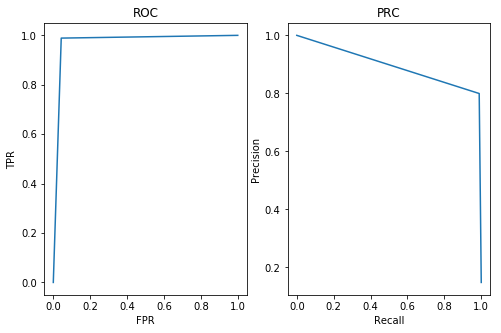

In [11]:
# To plot ROC and PRC
from sklearn.metrics import roc_curve, precision_recall_curve

# Compute FPR, TPR, Precision by iterating classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8,5))
axes[0].plot(fpr, tpr)
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title('ROC')

axes[1].plot(recall, precision)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('PRC')


## Evaluation

Text(0,0.5,'AUC score')

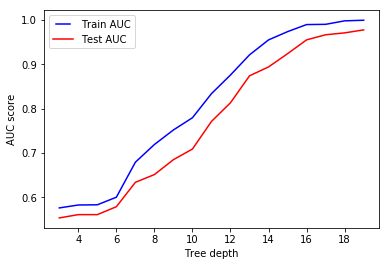

In [12]:
from sklearn import metrics #for metrics.auc
#before cross validation let's try few tests
y = data['Response']   # select target,
X=data.select_dtypes(include=['int64', 'float64'])
filter_col=list(X.columns)
#for ROC we need integer target
y = y.apply(lambda z : 1 if z=='Yes' else 0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
train_results = []
test_results = []

for i in range(3,20):
   dt = DecisionTreeClassifier(criterion='gini',max_depth=i)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
   roc_auc = metrics.auc(fpr, tpr)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
Line1,=plt.plot(range(3,20), train_results,color='blue',label="Train AUC")
Line2,=plt.plot(range(3,20), test_results, color='red',label="Test AUC")

plt.legend(handler_map={Line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Tree depth")
plt.ylabel('AUC score')

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection


# empty list that will hold cv scores
cv_scores = []


for i in range(10,21):
    dt = DecisionTreeClassifier(criterion='gini',max_depth=i)
    scores = model_selection.cross_val_score(dt, X, y, cv=5,scoring='accuracy' )
    
    cv_scores.append(scores.mean())
    print('cross_val_score: ' , i , 'is:', scores.mean())

('cross_val_score: ', 10, 'is:', 0.90661345472008925)
('cross_val_score: ', 11, 'is:', 0.91898430107060292)
('cross_val_score: ', 12, 'is:', 0.92741216298914986)
('cross_val_score: ', 13, 'is:', 0.94208503622580364)
('cross_val_score: ', 14, 'is:', 0.94985758225279349)
('cross_val_score: ', 15, 'is:', 0.9563183559341738)
('cross_val_score: ', 16, 'is:', 0.9613544133787334)
('cross_val_score: ', 17, 'is:', 0.96266810275350279)
('cross_val_score: ', 18, 'is:', 0.96671821984222261)
('cross_val_score: ', 19, 'is:', 0.96704596761492267)
('cross_val_score: ', 20, 'is:', 0.96628052319612046)


In [ ]:
#our model shows there is no overfits for large depth values. The tree somehow predicts all 
#of the train data and it does not fails to generalize the findings for new data
#we can try the same loop for min_samples_splits,min_samples_leafs, max_features
##https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
#The link above, explains overfitting


## Decision Tree for mean_label_encoding.csv¶

In [14]:
data = pd.read_csv(os.path.join(data_directory, "mean_label_encoding.csv"))

In [15]:
y = data['Response']   # select target,
X = data.drop('Response', axis = 1)
filter_col=list(X.columns)

#print ('list of columns:', filter_col)
print ('int and float columns:', len(list(X.columns)))
print ('all columns:', len(list(data.columns.values)))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier


dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.tree_.impurity #keeps the gini values of the tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\nconfusion_matrix:')
print(confusion_matrix(y_test,y_pred))
print('\naccuracy_score:')
print(accuracy_score(y_test, y_pred))
print('\nclassification_report:')
print(classification_report(y_test,y_pred))

print("\nfeature_importances:")
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    #print (filter_col[indices[f]])
    print("%d. feature %d (%f) name: %s " % (f + 1, indices[f], importances[indices[f]], filter_col[indices[f]] ))

('int and float columns:', 21)
('all columns:', 22)

confusion_matrix:
[[1512   45]
 [   0  270]]

accuracy_score:
0.975369458128

classification_report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1557
           1       0.86      1.00      0.92       270

   micro avg       0.98      0.98      0.98      1827
   macro avg       0.93      0.99      0.95      1827
weighted avg       0.98      0.98      0.98      1827


feature_importances:
1. feature 13 (0.121061) name: Customer Lifetime Value 
2. feature 20 (0.118082) name: Total Claim Amount 
3. feature 14 (0.113685) name: Income 
4. feature 17 (0.104428) name: Months Since Policy Inception 
5. feature 3 (0.093855) name: EmploymentStatus 
6. feature 15 (0.080799) name: Monthly Premium Auto 
7. feature 16 (0.080172) name: Months Since Last Claim 
8. feature 9 (0.062418) name: Renew Offer Type 
9. feature 10 (0.037372) name: Sales Channel 
10. feature 6 (0.036272) name: Marital

## Decision Tree for WeightofEvidence_encoding.csv

In [17]:
data = pd.read_csv(os.path.join(data_directory, "WeightofEvidence_encoding.csv"))

In [19]:
y = data['Response']   # select target,
X = data.drop('Response', axis = 1)
filter_col=list(X.columns)

#print ('list of columns:', filter_col)
print ('int and float columns:', len(list(X.columns)))
print ('all columns:', len(list(data.columns.values)))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier


dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.tree_.impurity #keeps the gini values of the tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\nconfusion_matrix:')
print(confusion_matrix(y_test,y_pred))
print('\naccuracy_score:')
print(accuracy_score(y_test, y_pred))
print('\nclassification_report:')
print(classification_report(y_test,y_pred))

print("\nfeature_importances:")
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    #print (filter_col[indices[f]])
    print("%d. feature %d (%f) name: %s " % (f + 1, indices[f], importances[indices[f]], filter_col[indices[f]] ))

('int and float columns:', 21)
('all columns:', 22)

confusion_matrix:
[[1512   45]
 [   2  268]]

accuracy_score:
0.974274767378

classification_report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1557
           1       0.86      0.99      0.92       270

   micro avg       0.97      0.97      0.97      1827
   macro avg       0.93      0.98      0.95      1827
weighted avg       0.98      0.97      0.98      1827


feature_importances:
1. feature 13 (0.139738) name: Customer Lifetime Value 
2. feature 14 (0.110692) name: Income 
3. feature 20 (0.103947) name: Total Claim Amount 
4. feature 3 (0.095958) name: EmploymentStatus 
5. feature 17 (0.094997) name: Months Since Policy Inception 
6. feature 16 (0.093343) name: Months Since Last Claim 
7. feature 15 (0.080567) name: Monthly Premium Auto 
8. feature 9 (0.062418) name: Renew Offer Type 
9. feature 6 (0.039552) name: Marital Status 
10. feature 10 (0.037307) name: Sales 